<a href="https://colab.research.google.com/github/ganu123561/ganesh/blob/main/climate_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset
data = pd.read_csv("/content/sample_data/climate/climate_data.csv")

# Select features (X) and target variable (y)
X = data.drop(columns=["Energy Consumption"])
y = data["Energy Consumption"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the FNN model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),  # Added an extra hidden layer
    Dense(1, activation='linear')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Corrected loss function

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # Corrected syntax
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]  # Corrected callback usage
)

# Evaluate model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3056296.7500 - val_loss: 2809731.7500
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2503893.0000 - val_loss: 1264048.5000
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 858691.1250 - val_loss: 117216.3203
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 72224.3828 - val_loss: 28882.9453
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 28487.1758 - val_loss: 23574.2070
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23421.6836 - val_loss: 21935.9297
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22941.3652 - val_loss: 21049.5352
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20377.1562 - val_loss: 20276.2695
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19842.6328 - val_loss: 19496.0957
Epoch 10/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19299.8359 - val_loss: 18621.3223
Epoch 11/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss:

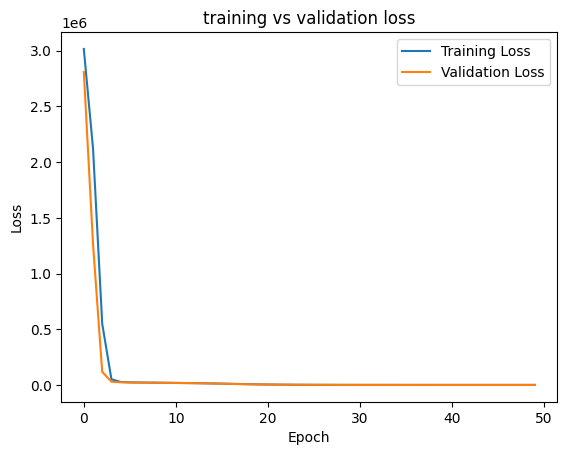

In [2]:
#step10  To visulize the Predections
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("training vs validation loss")
plt.show()